# **Import Required Libraries**

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# **Loading and Pre Processing the Data**

In [4]:
train_labels = pd.read_csv('../input/game-of-deep-learning-ship-datasets/train/train.csv')
train_labels['category'] = train_labels['category'] - 1
train_labels.head()

,image,category
0,2823080.jpg,0
1,2870024.jpg,0
2,2662125.jpg,1
3,2900420.jpg,2
4,2804883.jpg,1


In [5]:
X = []
y = []
path = "../input/game-of-deep-learning-ship-datasets/train/images/"
img_shape = 128
for i in train_labels.iterrows() :
    img_path = os.path.join(path, i[1]['image'])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_shape,img_shape), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    X.append(img)
    y.append(float(i[1]['category']))
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

((6252, 128, 128, 3), (6252,))

In [22]:
img.shape

(128, 128, 3)

In [6]:
X = X / 255.0

# **Viewing Sample Images from the Dataset**

Text(0.5, 1.0, '4.0')

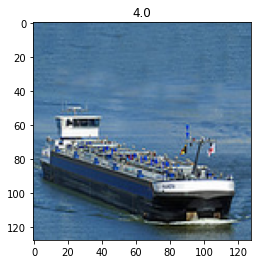

In [7]:
plt.imshow(X[1000])
plt.title(y[1000])

# **Creating a Deep Learning model using Keras**

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((img_shape,img_shape,3)),
    tf.keras.applications.MobileNet(include_top=False, weights='imagenet'),
    tf.keras.layers.Conv2D(3, 3, padding='same', activation='sigmoid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax'),
    tf.keras.layers.Dense(5, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

model.summary()

17227776/17225924 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 3)           27651     
_________________________________________________________________
flatten (Flatten)            (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 245       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
Total params: 3,256,790
Trainable params: 3,234,902
Non-trainable params: 21,888
_________________________________________________________________


# **Training the Deep Learning Model**

In [9]:
model.fit(X, y, epochs=50, batch_size=128, validation_split=0.25, shuffle=True)

Epoch 1/50
37/37 [==============================] - 15s 229ms/step - loss: 1.6172 - accuracy: 0.2800 - val_loss: 1.5157 - val_accuracy: 0.4517
Epoch 2/50
37/37 [==============================] - 7s 186ms/step - loss: 1.4820 - accuracy: 0.5014 - val_loss: 1.4776 - val_accuracy: 0.4914
Epoch 3/50
37/37 [==============================] - 7s 186ms/step - loss: 1.4456 - accuracy: 0.5057 - val_loss: 1.4524 - val_accuracy: 0.5067
Epoch 4/50
37/37 [==============================] - 7s 185ms/step - loss: 1.4233 - accuracy: 0.5156 - val_loss: 1.4383 - val_accuracy: 0.5195
Epoch 5/50
37/37 [==============================] - 7s 187ms/step - loss: 1.4102 - accuracy: 0.5256 - val_loss: 1.4280 - val_accuracy: 0.5278
Epoch 6/50
37/37 [==============================] - 7s 187ms/step - loss: 1.4022 - accuracy: 0.5231 - val_loss: 1.4182 - val_accuracy: 0.5432
Epoch 7/50
37/37 [==============================] - 7s 185ms/step - loss: 1.3883 - accuracy: 0.5368 - val_loss: 1.4065 - val_accuracy: 0.5797
Epoch

# **Evaluating the model on whole dataset**

In [10]:
model.evaluate(X,y)

196/196 [==============================] - 2s 12ms/step - loss: 1.0631 - accuracy: 0.9627


[1.063070297241211, 0.9627318978309631]

In [33]:
y_pred = np.argmax(model.predict(X), axis=1)

In [34]:
from sklearn.metrics import accuracy_score, cohen_kappa_score
print(cohen_kappa_score(y_pred,y))
print(accuracy_score(y_pred,y))

0.951604915467337
0.9627319257837492


In [12]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(X,y)

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets

# **Defining labels**

In [11]:
labels_inv = {'Cargo': 0,
              'Military': 1,
              'Carrier': 2,
              'Cruise': 3,
              'Tankers': 4}
labels = {v:k for k,v in labels_inv.items()}
labels

{0: 'Cargo', 1: 'Military', 2: 'Carrier', 3: 'Cruise', 4: 'Tankers'}

# **Helper Function for Prediction**

In [14]:
def predict(path) :
    img = tf.keras.preprocessing.image.load_img(path, target_size=(img_shape,img_shape), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    pred = model.predict(np.array([img]))
    plt.imshow(img)
    pred_label = np.argsort(pred)
    for i in pred_label[0][-1:-3:-1] :
        print(f"{labels[i]} Ship : {pred[0][i]*100:0.2f} %")

In [17]:
pred = model.predict(np.array([img]))
pred.shape


(1, 5)

In [18]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(pred,y)

ValueError: Found input variables with inconsistent numbers of samples: [1, 6252]

# **Testing the model categories obtained from the internet**


In [16]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg/1200px-MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg

--2023-01-19 14:01:32--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg/1200px-MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221071 (216K) [image/jpeg]
Saving to: ‘1200px-MAERSK_MC_KINNEY_MÖLLER_&_MARSEILLE_MAERSK_(48694054418).jpg’

1200px-MAERSK_MC_KI 100%[===================>] 215.89K   732KB/s    in 0.3s    

2023-01-19 14:01:32 (732 KB/s) - ‘1200px-MAERSK_MC_KINNEY_MÖLLER_&_MARSEILLE_MAERSK_(48694054418).jpg’ saved [221071/221071]



Cargo Ship : 51.70 %
Military Ship : 34.43 %


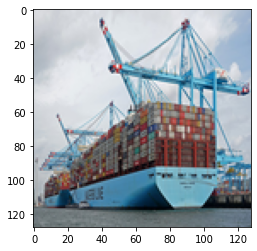

In [17]:
predict("./1200px-MAERSK_MC_KINNEY_MÖLLER_&_MARSEILLE_MAERSK_(48694054418).jpg") # Cargo Ship Example from Internet

In [18]:
!wget https://media.architecturaldigest.com/photos/593829315838160353567328/master/pass/mscworldclass.jpg

--2023-01-19 14:02:07--  https://media.architecturaldigest.com/photos/593829315838160353567328/master/pass/mscworldclass.jpg
Resolving media.architecturaldigest.com (media.architecturaldigest.com)... 146.75.36.239
Connecting to media.architecturaldigest.com (media.architecturaldigest.com)|146.75.36.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193144 (189K) [image/jpeg]
Saving to: ‘mscworldclass.jpg’

mscworldclass.jpg   100%[===================>] 188.62K   902KB/s    in 0.2s    

2023-01-19 14:02:08 (902 KB/s) - ‘mscworldclass.jpg’ saved [193144/193144]



Cargo Ship : 44.57 %
Cruise Ship : 27.90 %


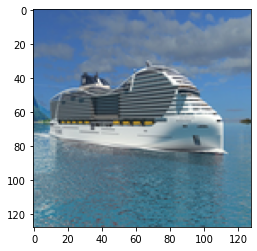

In [19]:
predict("./mscworldclass.jpg") # Cruise Ship Example from Internet

In [22]:
!wget https://www.dnv.com/Images/KP_Tan_269_Tanker_vessel_tcm71-192023.jpg

--2023-01-19 14:04:50--  https://www.dnv.com/Images/KP_Tan_269_Tanker_vessel_tcm71-192023.jpg
Resolving www.dnv.com (www.dnv.com)... 193.161.97.170
Connecting to www.dnv.com (www.dnv.com)|193.161.97.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256495 (250K) [image/jpeg]
Saving to: ‘KP_Tan_269_Tanker_vessel_tcm71-192023.jpg’

KP_Tan_269_Tanker_v 100%[===================>] 250.48K  1.36MB/s    in 0.2s    

2023-01-19 14:04:51 (1.36 MB/s) - ‘KP_Tan_269_Tanker_vessel_tcm71-192023.jpg’ saved [256495/256495]



Cargo Ship : 69.67 %
Cruise Ship : 12.90 %


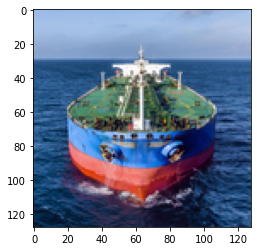

In [23]:
predict("./KP_Tan_269_Tanker_vessel_tcm71-192023.jpg") # Tanker Ship Example from Internet

In [26]:
!wget https://cdn.britannica.com/34/94834-050-16DB7EEB/USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg

--2023-01-19 14:04:55--  https://cdn.britannica.com/34/94834-050-16DB7EEB/USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 52.222.139.5, 52.222.139.64, 52.222.139.124, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|52.222.139.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263703 (258K) [image/jpeg]
Saving to: ‘USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg’

USS-Carl-Vinson-air 100%[===================>] 257.52K   953KB/s    in 0.3s    

2023-01-19 14:04:56 (953 KB/s) - ‘USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg’ saved [263703/263703]



Cargo Ship : 33.37 %
Cruise Ship : 28.23 %


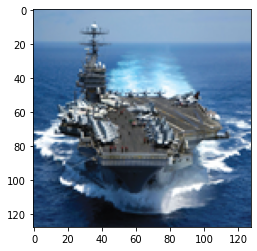

In [27]:
predict("./USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg")

In [28]:
!wget https://chantiers-atlantique.com/wp-content/uploads/2021/05/Page-Activite%CC%81s-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg

--2023-01-19 14:04:57--  https://chantiers-atlantique.com/wp-content/uploads/2021/05/Page-Activite%CC%81s-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg
Resolving chantiers-atlantique.com (chantiers-atlantique.com)... 217.147.196.220
Connecting to chantiers-atlantique.com (chantiers-atlantique.com)|217.147.196.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276929 (270K) [image/jpeg]
Saving to: ‘Page-Activités-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg’

Page-Activités-BPC- 100%[===================>] 270.44K  --.-KB/s    in 0.04s   

2023-01-19 14:04:57 (6.49 MB/s) - ‘Page-Activités-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg’ saved [276929/276929]



Cargo Ship : 63.62 %
Military Ship : 28.83 %


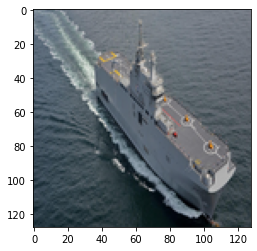

In [29]:
predict("./Page-Activités-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg")

In [34]:
!wget https://www.theenterpriseworld.com/wp-content/uploads/2021/03/suez-canal-ship-stuck.jpg

--2023-01-19 14:05:02--  https://www.theenterpriseworld.com/wp-content/uploads/2021/03/suez-canal-ship-stuck.jpg
Resolving www.theenterpriseworld.com (www.theenterpriseworld.com)... 185.28.21.56, 2a02:4780:1:635:0:10b0:c9bd:2
Connecting to www.theenterpriseworld.com (www.theenterpriseworld.com)|185.28.21.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53004 (52K) [image/jpeg]
Saving to: ‘suez-canal-ship-stuck.jpg’

suez-canal-ship-stu 100%[===================>]  51.76K   205KB/s    in 0.3s    

2023-01-19 14:05:03 (205 KB/s) - ‘suez-canal-ship-stuck.jpg’ saved [53004/53004]



Cargo Ship : 81.48 %
Military Ship : 10.10 %


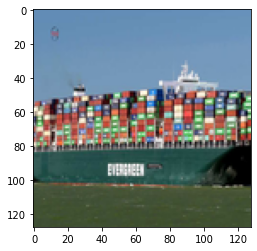

In [35]:
predict("./suez-canal-ship-stuck.jpg")

In [36]:
sub = pd.read_csv("../input/game-of-deep-learning-ship-datasets/sample_submission_ns2btKE.csv")
sub.head()

,image,category
0,1007700.jpg,1
1,1011369.jpg,1
2,1051155.jpg,1
3,1062001.jpg,1
4,1069397.jpg,1


In [38]:
X_sub = []
path = "../input/game-of-deep-learning-ship-datasets/train/images/"
img_shape = 128
for i in sub.iterrows() :
    img_path = os.path.join(path, i[1]['image'])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_shape,img_shape), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    X_sub.append(img)
X_sub = np.asarray(X_sub)
X_sub.shape

(2680, 128, 128, 3)

In [39]:
sub.shape

(2680, 2)

In [40]:
y_sub_cat = model.predict(X_sub)
y_sub = np.argmax(y_sub_cat, axis=1)
y_sub.shape

(2680,)

In [41]:
sub['category'] = y_sub + 1

In [42]:
sub['category'].value_counts()

1    1973
2     548
4     138
5      21
Name: category, dtype: int64